In [1]:
from paddleocr import PaddleOCR, draw_ocr

In [2]:
# Also switch the language by modifying the lang parameter
ocr = PaddleOCR(lang="en") 
# The model file will be downloaded automatically when executed for the first time

Namespace(cls_batch_num=6, cls_image_shape='3, 48, 192', cls_model_dir='C:\\Users\\Sai Tej/.paddleocr/2.1/cls', cls_thresh=0.9, det=True, det_algorithm='DB', det_db_box_thresh=0.5, det_db_thresh=0.3, det_db_unclip_ratio=1.6, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_east_score_thresh=0.8, det_limit_side_len=960, det_limit_type='max', det_model_dir='C:\\Users\\Sai Tej/.paddleocr/2.1/det/en', drop_score=0.5, enable_mkldnn=False, gpu_mem=8000, image_dir='', ir_optim=True, label_list=['0', '180'], lang='en', max_text_length=25, rec=True, rec_algorithm='CRNN', rec_batch_num=6, rec_char_dict_path='./ppocr/utils/en_dict.txt', rec_char_type='ch', rec_image_shape='3, 32, 320', rec_model_dir='C:\\Users\\Sai Tej/.paddleocr/2.1/rec/en', use_angle_cls=False, use_dilation=False, use_gpu=True, use_pdserving=False, use_space_char=True, use_tensorrt=False, use_zero_copy_run=False)


In [5]:
img_path ='Images/sample_1.jpg'

In [6]:
result = ocr.ocr(img_path)
# Recognition and detection can be performed separately through parameter control
# result = ocr.ocr(img_path, det=False)  Only perform recognition
# result = ocr.ocr(img_path, rec=False)  Only perform detection
# Print detection frame and recognition result
for line in result:
    print(line)

[2021/06/23 14:42:43] root INFO: dt_boxes num : 44, elapse : 0.7380468845367432
[2021/06/23 14:42:45] root INFO: rec_res num  : 44, elapse : 1.419022798538208
[[[21.0, 12.0], [114.0, 14.0], [114.0, 42.0], [21.0, 40.0]], ('Invoice', 0.9961042)]
[[[350.0, 66.0], [419.0, 66.0], [419.0, 74.0], [350.0, 74.0]], ('Company Name', 0.94064736)]
[[[351.0, 76.0], [391.0, 76.0], [391.0, 85.0], [351.0, 85.0]], ('1Main St', 0.9944681)]
[[[350.0, 87.0], [457.0, 87.0], [457.0, 98.0], [350.0, 98.0]], ('San Francisco CA94122', 0.9871251)]
[[[351.0, 99.0], [371.0, 99.0], [371.0, 109.0], [351.0, 109.0]], ('USA', 0.99935293)]
[[[350.0, 121.0], [426.0, 121.0], [426.0, 130.0], [350.0, 130.0]], ('www.domain.com', 0.9969234)]
[[[27.0, 131.0], [96.0, 133.0], [95.0, 143.0], [27.0, 141.0]], ('Customer Name', 0.96860063)]
[[[351.0, 132.0], [411.0, 132.0], [411.0, 141.0], [351.0, 141.0]], ('ABN 221133', 0.9777961)]
[[[26.0, 153.0], [84.0, 155.0], [83.0, 166.0], [25.0, 164.0]], ('Posteode City', 0.9714966)]
[[[27.0, 

In [7]:
# Visualization
from PIL import Image
image = Image.open(img_path).convert('RGB')
result = ocr.ocr(img_path)
boxes = [line[0] for line in result]
txts = [line[1][0] for line in result]
scores = [line[1][1] for line in result]

[2021/06/23 14:42:50] root INFO: dt_boxes num : 44, elapse : 0.5640466213226318
[2021/06/23 14:42:51] root INFO: rec_res num  : 44, elapse : 1.3279731273651123


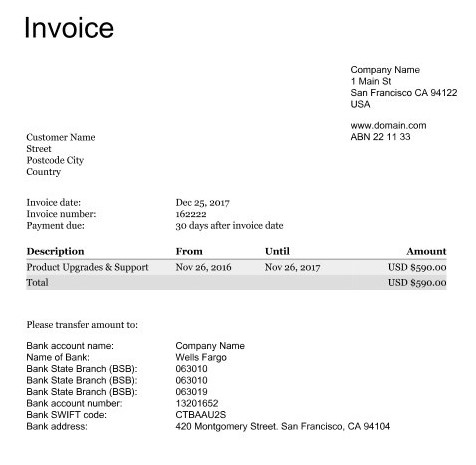

In [8]:
image

In [13]:
im_show = draw_ocr(image, boxes, txts, scores, font_path='arial.ttf')
im_show = Image.fromarray(im_show)
im_show.save('result.jpg')

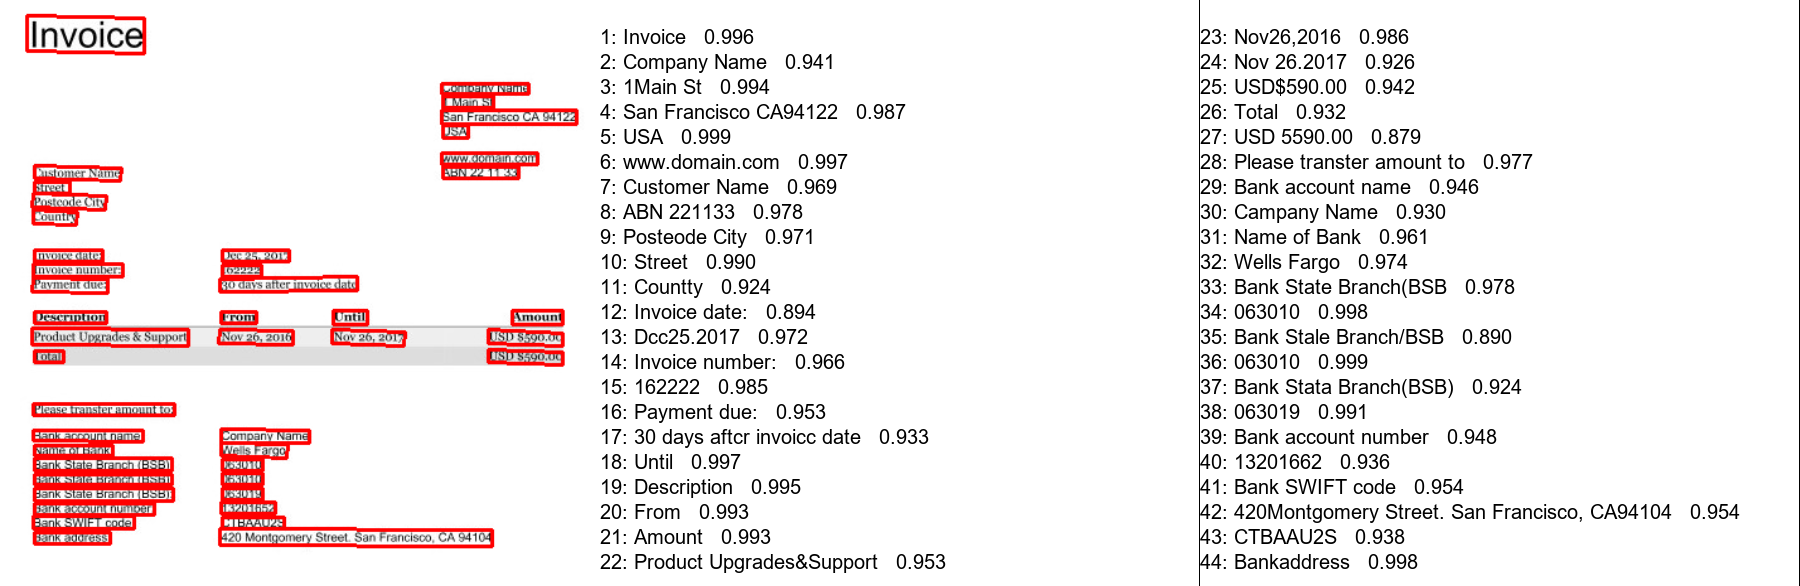

In [12]:
im_show

In [32]:
txts

['MEDICALBILLRECEIPT',
 'Receipt Number:',
 '555-5555',
 'Date:',
 '01/01/19',
 'Name of Medical lnstitution',
 'WidgetMemorialHospital',
 'Practitioner Name',
 'Johnathan Doe.M.D',
 'License Number',
 '55555555555',
 'Address',
 '1Main Street',
 'City/State/ZIP:SpringfeldNaw Mexico 55555',
 'Patient Information',
 'Name:',
 'Jane DDoe',
 'Street Address',
 '1Main',
 'AYeniie',
 'City/State/ZIP',
 '55555']